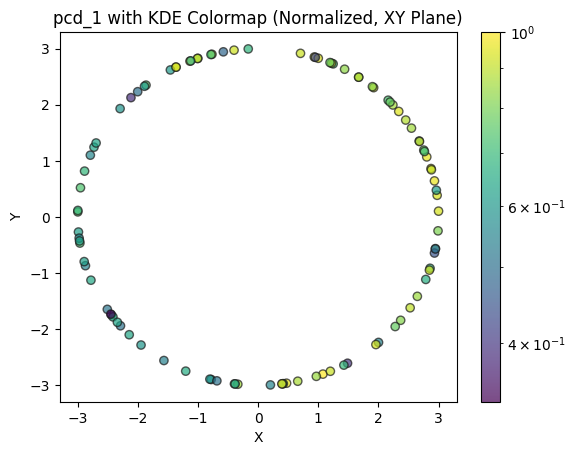

In [1]:
# Re-importing necessary libraries after code execution reset
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.colors import LogNorm

def plot_pcd_with_colormap(pcd, kde_values, title):
    fig, ax = plt.subplots()
    sc = ax.scatter(pcd[:, 0], pcd[:, 1], c=kde_values, cmap='viridis', edgecolor='0.1', alpha=0.7, norm=LogNorm())
    plt.colorbar(sc, ax=ax)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.show()

np.random.seed(42)
n_points = 100
theta = np.random.uniform(0, 2*np.pi, n_points)
r = 3 * np.ones(n_points)  # All points are at radius 3
x_1 = r * np.cos(theta)
y_1 = r * np.sin(theta)
z_1 = np.random.uniform(0, 1, n_points)
filtered_pcd_1 = np.column_stack([x_1, y_1, z_1])

updated_weight_1 = np.ones(n_points)

kde_1 = stats.gaussian_kde(filtered_pcd_1.T, weights=updated_weight_1)

kde_values_1 = kde_1.evaluate(filtered_pcd_1.T)

kde_values_1_normalized = kde_values_1 / np.max(kde_values_1)

plot_pcd_with_colormap(filtered_pcd_1, kde_values_1_normalized, "pcd_1 with KDE Colormap (Normalized, XY Plane)")


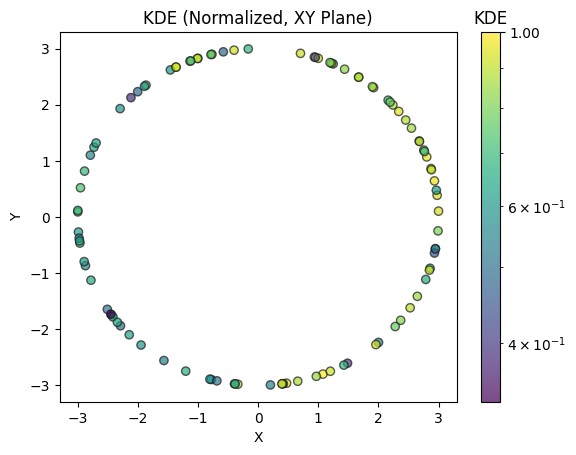

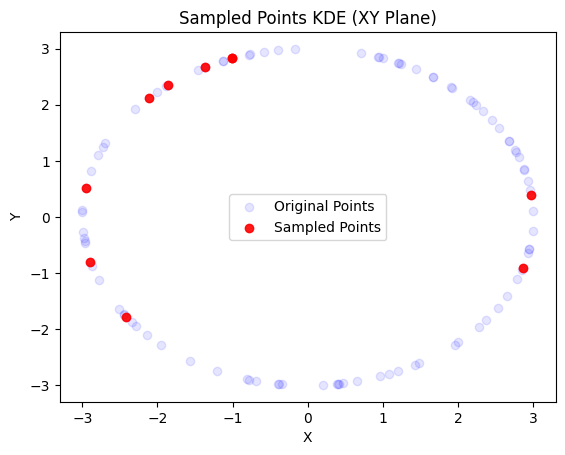

In [2]:
# Function to plot pcd with KDE values in colormap on XY plane, with decimal labels on the color bar
def plot_pcd_with_decimal_colormap(pcd, kde_values, title):
    fig, ax = plt.subplots()
    sc = ax.scatter(pcd[:, 0], pcd[:, 1], c=kde_values, cmap='viridis', edgecolor='0.1', alpha=0.7, norm=LogNorm())
    cbar = plt.colorbar(sc, ax=ax, format='%.2f')
    cbar.ax.set_title('KDE')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.show()

def sample_from_kde(pcd, kde_values, num_samples=10):
    kde_values_norm = kde_values / np.sum(kde_values)
    sampled_indices = np.random.choice(len(pcd), size=num_samples, p=kde_values_norm)
    return pcd[sampled_indices]

plot_pcd_with_decimal_colormap(filtered_pcd_1, kde_values_1_normalized, "KDE (Normalized, XY Plane)")


# Sample 10 points from the KDE
sampled_points = sample_from_kde(filtered_pcd_1, kde_values_1_normalized, num_samples=10)

# Plot sampled points
plt.scatter(filtered_pcd_1[:, 0], filtered_pcd_1[:, 1], c='blue', label='Original Points', alpha=0.1)
plt.scatter(sampled_points[:, 0], sampled_points[:, 1], c='red', label='Sampled Points', alpha=0.9)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Sampled Points KDE (XY Plane)')
plt.show()


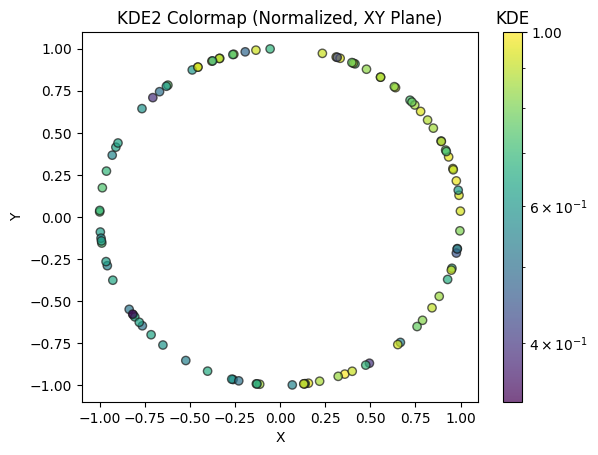

In [3]:
# Generate random points for pcd_2 within a circle of radius 1 in XY-plane, with Z-values between 0 and 1
np.random.seed(42)
n_points = 100
theta = np.random.uniform(0, 2*np.pi, n_points)
r = np.ones(n_points)  # All points are at radius 1
x_2 = r * np.cos(theta)
y_2 = r * np.sin(theta)
z_2 = np.random.uniform(0, 1, n_points)
filtered_pcd_2 = np.column_stack([x_2, y_2, z_2])

# Generate KDE model for new pcd_2 with radius 1
kde_2_radius_1 = stats.gaussian_kde(filtered_pcd_2.T)

# Evaluate KDE values for new pcd_2
kde_values_2 = kde_2_radius_1.evaluate(filtered_pcd_2.T)

# Normalize the KDE values
kde_values_2_normalized = kde_values_2 / np.max(kde_values_2)

# Plot new pcd_2 with colormap
plot_pcd_with_decimal_colormap(filtered_pcd_2, kde_values_2_normalized, "KDE2 Colormap (Normalized, XY Plane)")


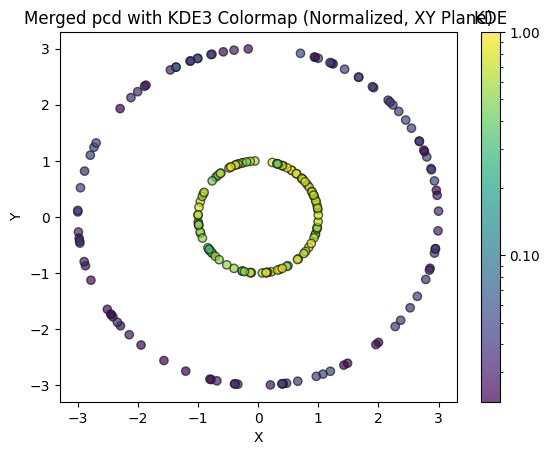

In [4]:
beta = 0.1
weights_1 = np.ones(filtered_pcd_1.shape[0]) * beta
weights_2 = np.ones(filtered_pcd_2.shape[0]) * (1 - beta)

merged_pcd = np.vstack([filtered_pcd_1, filtered_pcd_2])
merged_weights = np.concatenate([weights_1, weights_2])
merged_kde = stats.gaussian_kde(merged_pcd.T, weights=merged_weights, bw_method=0.33)

# Evaluate the KDE values for the merged pcd
merged_kde_values = merged_kde.evaluate(merged_pcd.T)
# Normalize
merged_kde_values_normalized = merged_kde_values / np.max(merged_kde_values)

plot_pcd_with_decimal_colormap(merged_pcd, merged_kde_values_normalized, "Merged pcd with KDE3 Colormap (Normalized, XY Plane)")


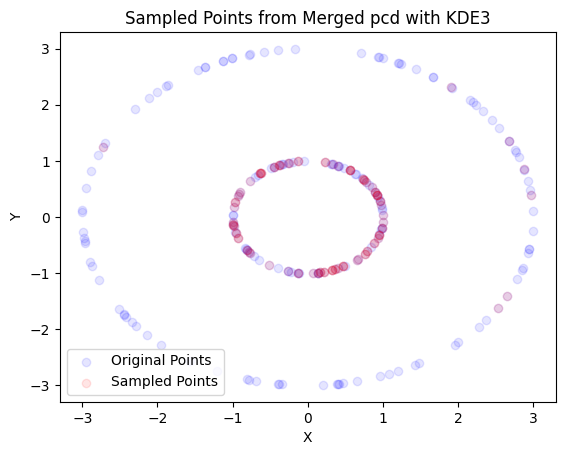

In [5]:
sampled_points_merged = sample_from_kde(merged_pcd, merged_kde_values_normalized, num_samples=100)

plt.scatter(merged_pcd[:, 0], merged_pcd[:, 1], c='blue', label='Original Points', alpha=0.1)
plt.scatter(sampled_points_merged[:, 0], sampled_points_merged[:, 1], c='red', label='Sampled Points', alpha=0.1)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Sampled Points from Merged pcd with KDE3')
plt.show()


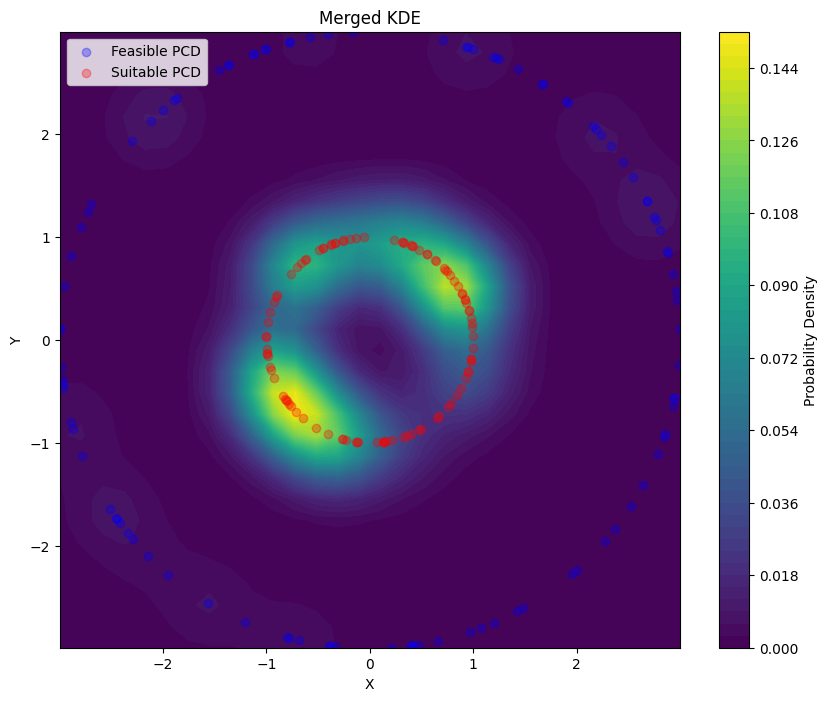

In [6]:
# Generate 2D grid coordinates for evaluation
x_min, x_max = merged_pcd[:, 0].min(), merged_pcd[:, 0].max()
y_min, y_max = merged_pcd[:, 1].min(), merged_pcd[:, 1].max()
xi_2d, yi_2d = np.mgrid[x_min:x_max:30j, y_min:y_max:30j]

# Create 3D grid coordinates with fixed z-values (0 in this case)
grid_coords_2d = np.vstack([xi_2d.ravel(), yi_2d.ravel()])
z_fixed = np.zeros(grid_coords_2d.shape[1])
grid_coords_3d = np.vstack([grid_coords_2d, z_fixed])

# Re-evaluate the KDE on the 3D grid with a fixed z-value
kde_values_2d_noise = merged_kde.evaluate(grid_coords_3d).reshape(xi_2d.shape)

# 2D Plot of the KDE on the XY-plane with noise
plt.figure(figsize=(10, 8))
plt.contourf(xi_2d, yi_2d, kde_values_2d_noise, levels=50, cmap='viridis')
plt.colorbar(label='Probability Density')
plt.scatter(filtered_pcd_1[:, 0], filtered_pcd_1[:, 1], c='blue', label='Feasible PCD', alpha=0.3)
plt.scatter(filtered_pcd_2[:, 0], filtered_pcd_2[:, 1], c='red', label='Suitable PCD', alpha=0.3)
# plt.scatter(merged_pcd[:, 0], merged_pcd[:, 1], c='red', label='Original Points', alpha=0.6)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Merged KDE')
plt.legend()
plt.show()


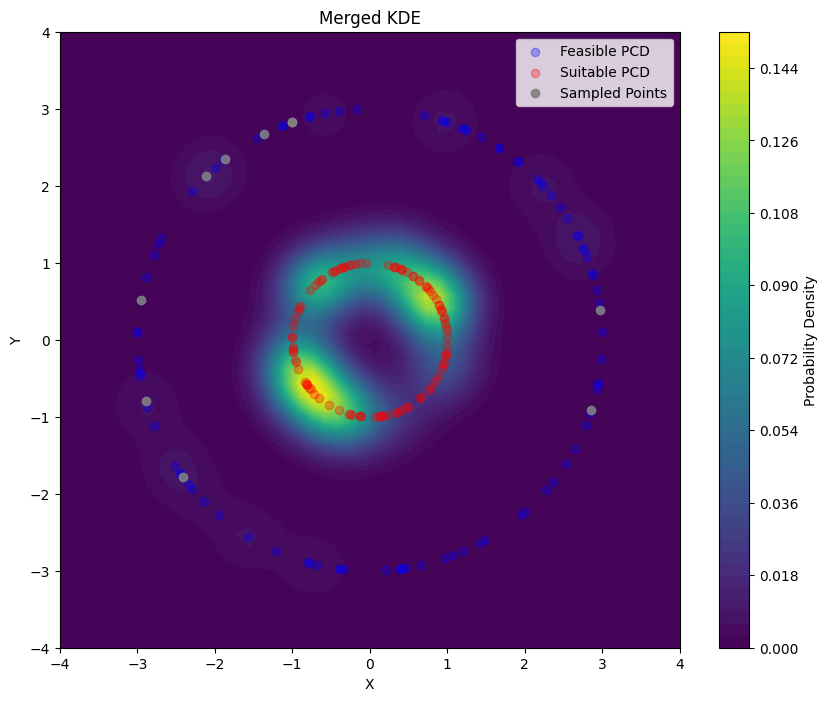

In [7]:
# Extend the range for a larger 2D grid
xi_2d_extended, yi_2d_extended = np.mgrid[-4:4:50j, -4:4:50j]

# Create 3D grid coordinates with fixed z-values (0 in this case)
grid_coords_2d_extended = np.vstack([xi_2d_extended.ravel(), yi_2d_extended.ravel()])
z_fixed_extended = np.zeros(grid_coords_2d_extended.shape[1])
grid_coords_3d_extended = np.vstack([grid_coords_2d_extended, z_fixed_extended])

# Re-evaluate the KDE on the extended 3D grid with a fixed z-value
kde_values_2d_extended = merged_kde.evaluate(grid_coords_3d_extended).reshape(xi_2d_extended.shape)

sampled_pcd = sample_from_kde(merged_pcd, merged_kde_values_normalized, num_samples=10)

# 2D Plot of the KDE on the extended XY-plane
plt.figure(figsize=(10, 8))
plt.contourf(xi_2d_extended, yi_2d_extended, kde_values_2d_extended, levels=50, cmap='viridis')
plt.colorbar(label='Probability Density')
plt.scatter(filtered_pcd_1[:, 0], filtered_pcd_1[:, 1], c='blue', label='Feasible PCD', alpha=0.3)
plt.scatter(filtered_pcd_2[:, 0], filtered_pcd_2[:, 1], c='red', label='Suitable PCD', alpha=0.3)
plt.scatter(sampled_points[:, 0], sampled_points[:, 1], c='gray', label='Sampled Points', alpha=0.9)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Merged KDE')
plt.legend()
plt.show()


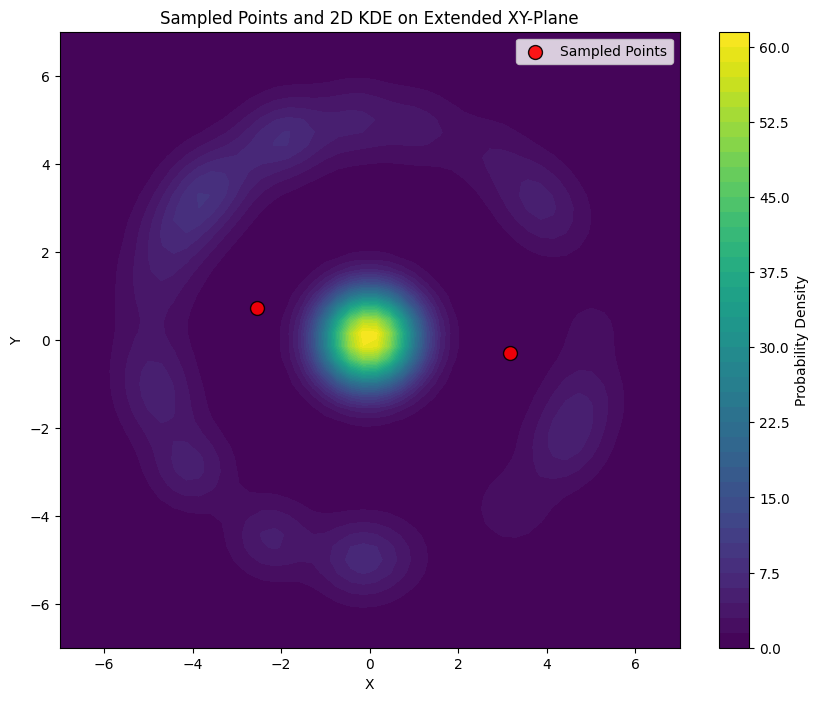

In [8]:
# Re-creating the KDE and grid since the execution state was reset
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt

def sample_from_kde(pcd, kde_values, num_samples=10):
    kde_values_flat = kde_values.flatten()
    kde_values_norm = kde_values_flat / np.sum(kde_values_flat)
    sampled_indices = np.random.choice(len(kde_values_flat), size=num_samples, p=kde_values_norm)
    sampled_coords = np.array(np.unravel_index(sampled_indices, kde_values.shape)).T

    # Convert indices to actual coordinates
    x, y, z = pcd[:, 0], pcd[:, 1], pcd[:, 2]
    x_range = np.linspace(x.min(), x.max(), kde_values.shape[0])
    y_range = np.linspace(y.min(), y.max(), kde_values.shape[0])
    # z_range = np.linspace(z.min(), z.max(), kde_values.shape[0])
    
    sampled_xyz = np.array([x_range[sampled_coords[:, 0]], y_range[sampled_coords[:, 1]]])#, z_range[sampled_coords[:, 2]]]).T

    return sampled_xyz

theta = np.linspace(0, 2*np.pi, 100)
r1, r2 = 5, 0.5  # radiius
x1, y1 = r1 * np.cos(theta), r1 * np.sin(theta)
x2, y2 = r2 * np.cos(theta), r2 * np.sin(theta)
z = np.zeros_like(x1)

pcd1 = np.column_stack([x1, y1, z])
pcd2 = np.column_stack([x2, y2, z])

# Add noise
noise_stddev = 0.001
pcd1_noise = pcd1 + np.random.normal(scale=noise_stddev, size=pcd1.shape)
pcd2_noise = pcd2 + np.random.normal(scale=noise_stddev, size=pcd2.shape)

# Merge the point clouds and add weights
betas = 0.5
merged_pcd_noise = np.vstack([pcd1_noise, pcd2_noise])
weights1 = np.ones(pcd1_noise.shape[0])
weights2 = np.ones(pcd2_noise.shape[0]) 
merged_weights_noise = np.concatenate([weights1, weights2])

merged_kde_noise = gaussian_kde(merged_pcd_noise.T, weights=merged_weights_noise, bw_method=0.25)
xi, yi, zi = np.mgrid[-7:7:50j, -7:7:50j, 0:0:1j]
grid_coords = np.vstack([xi.ravel(), yi.ravel(), zi.ravel()])

kde_values = merged_kde_noise.evaluate(grid_coords).reshape(xi.shape[:-1])
sampled_points = sample_from_kde(merged_pcd_noise, kde_values, num_samples=10)

# Plot the sampled points along with the KDE
plt.figure(figsize=(10, 8))
plt.contourf(xi[:,:,0], yi[:,:,0], kde_values, levels=50, cmap='viridis')
plt.colorbar(label='Probability Density')
# plt.scatter(pcd1[:, 0], pcd1[:, 1], c='blue', label='Feasible PCD', alpha=0.3)
# plt.scatter(pcd2[:, 0], pcd2[:, 1], c='red', label='Suitable PCD', alpha=0.3)
plt.scatter(sampled_points[:, 0], sampled_points[:, 1], c='red', label='Sampled Points', alpha=0.9, s=100, edgecolors='k')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sampled Points and 2D KDE on Extended XY-Plane')
plt.legend()
plt.show()


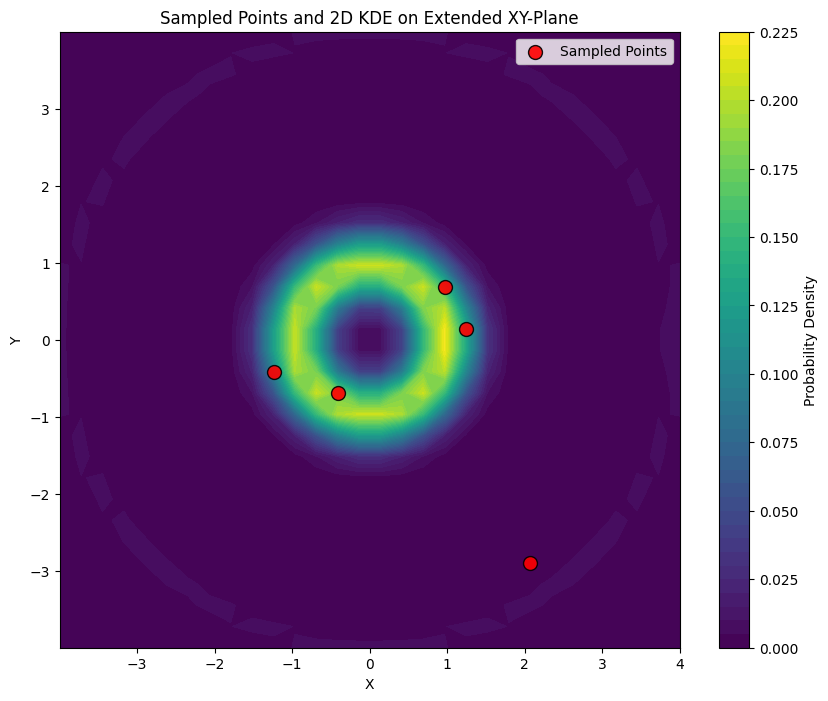

In [11]:
# Importing required libraries again due to the execution state reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Function to sample from KDE distribution
def sample_from_kde_2d(pcd, kde_values, num_samples=10):
    kde_values_flat = kde_values.flatten()
    kde_values_norm = kde_values_flat / np.sum(kde_values_flat)
    sampled_indices = np.random.choice(len(kde_values_flat), size=num_samples, p=kde_values_norm)
    sampled_coords = np.array(np.unravel_index(sampled_indices, kde_values.shape)).T

    # Convert indices to actual coordinates
    x, y = pcd[:, 0], pcd[:, 1]
    x_range = np.linspace(x.min(), x.max(), kde_values.shape[0])
    y_range = np.linspace(y.min(), y.max(), kde_values.shape[1])
    sampled_xy = np.array([x_range[sampled_coords[:, 0]], y_range[sampled_coords[:, 1]]]).T

    return sampled_xy

# Re-generating the synthetic data and plots
theta = np.linspace(0, 2*np.pi, 100)
r1, r2 = 4, 1  # radii
x1, y1 = r1 * np.cos(theta), r1 * np.sin(theta)
x2, y2 = r2 * np.cos(theta), r2 * np.sin(theta)

# Prepare the point clouds
pcd1 = np.column_stack([x1, y1])
pcd2 = np.column_stack([x2, y2])

# Merge the point clouds and add weights
merged_pcd = np.vstack([pcd1, pcd2])
weights1 = np.ones(pcd1.shape[0]) * 0.1
weights2 = np.ones(pcd2.shape[0]) * 0.9
merged_weights = np.concatenate([weights1, weights2])

# Create the KDE
merged_kde = gaussian_kde(merged_pcd.T, weights=merged_weights, bw_method=0.25)

# Generate 2D grid coordinates for evaluation
x_min, x_max = merged_pcd[:, 0].min(), merged_pcd[:, 0].max()
y_min, y_max = merged_pcd[:, 1].min(), merged_pcd[:, 1].max()
xi_2d, yi_2d = np.mgrid[x_min:x_max:30j, y_min:y_max:30j]

# Create 2D grid coordinates
grid_coords_2d = np.vstack([xi_2d.ravel(), yi_2d.ravel()])

# Evaluate the KDE
kde_values_2d = merged_kde.evaluate(grid_coords_2d).reshape(xi_2d.shape)

# Sample from the distribution
sampled_points = sample_from_kde_2d(merged_pcd, kde_values_2d, num_samples=5)

# Plot the KDE and the sampled points
plt.figure(figsize=(10, 8))
plt.contourf(xi_2d, yi_2d, kde_values_2d, levels=50, cmap='viridis')
plt.colorbar(label='Probability Density')
plt.scatter(sampled_points[:, 0], sampled_points[:, 1], c='red', label='Sampled Points', alpha=0.9, s=100, edgecolors='k')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sampled Points and 2D KDE on Extended XY-Plane')
plt.legend()
plt.show()


/var/folders/vl/_l8h269d63ld8c69dj0g8y180000gn/T/ipykernel_42806/249995927.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', bbox_to_anchor=(1.,1.))


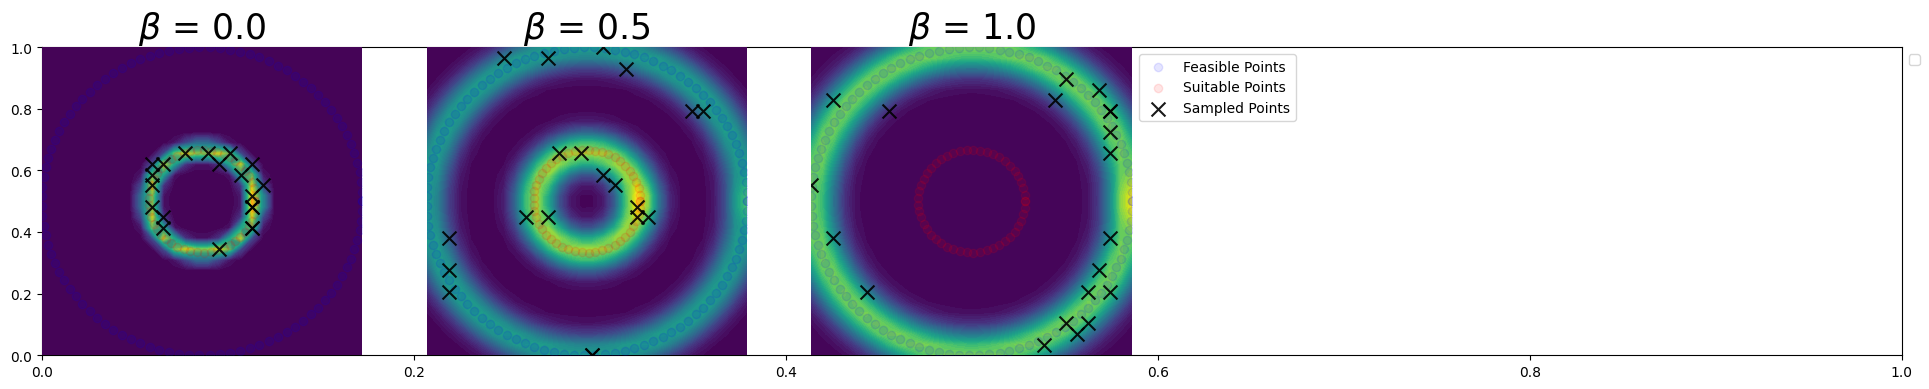

In [12]:
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import numpy as np

def sample_from_kde(pcd, kde_values, num_samples=10):
    kde_values_flat = kde_values.flatten()
    kde_values_norm = kde_values_flat / np.sum(kde_values_flat)
    sampled_indices = np.random.choice(len(kde_values_flat), size=num_samples, p=kde_values_norm)
    sampled_coords = np.array(np.unravel_index(sampled_indices, kde_values.shape)).T

    x_range = np.linspace(pcd[:, 0].min(), pcd[:, 0].max(), kde_values.shape[0])
    y_range = np.linspace(pcd[:, 1].min(), pcd[:, 1].max(), kde_values.shape[1])
    
    sampled_xy = np.array([x_range[sampled_coords[:, 0]], y_range[sampled_coords[:, 1]]]).T

    return sampled_xy

theta = np.linspace(0, 2*np.pi, 100)
theta_2 = np.linspace(0, 2*np.pi, 50)
r1, r2 = 3, 1  
x1, y1 = r1 * np.cos(theta), r1 * np.sin(theta)
x2, y2 = r2 * np.cos(theta_2), r2 * np.sin(theta_2)
pcd1 = np.column_stack([x1, y1])
pcd2 = np.column_stack([x2, y2])

# betas = [0.0, 0.2, 0.5, 0.8, 1.0]
betas = [0.0, 0.5, 1.0]

plt.figure(figsize=(24,4))
plt.legend(loc='upper left', bbox_to_anchor=(1.,1.))
for beta in betas:
    weights1 = np.ones(pcd1.shape[0]) * beta
    weights2 = np.ones(pcd2.shape[0]) * (1 - beta)
    merged_pcd = np.vstack([pcd1, pcd2])
    merged_weights = np.concatenate([weights1, weights2])

    merged_kde = gaussian_kde(merged_pcd.T, weights=merged_weights, bw_method=0.15)

    x_min, x_max = merged_pcd[:, 0].min(), merged_pcd[:, 0].max()
    y_min, y_max = merged_pcd[:, 1].min(), merged_pcd[:, 1].max()
    xi, yi = np.mgrid[x_min:x_max:30j, y_min:y_max:30j]

    grid_coords = np.vstack([xi.ravel(), yi.ravel()])

    kde_values = merged_kde.evaluate(grid_coords).reshape(xi.shape)
    sampled_points = sample_from_kde(merged_pcd, kde_values, num_samples=20)

    plt.subplot(1, 5, betas.index(beta) + 1)
    plt.contourf(xi, yi, kde_values, levels=50, cmap='viridis')
    # plt.colorbar(label='Probability Density')
    plt.scatter(pcd1[:, 0], pcd1[:, 1], c='blue', label='Feasible Points', alpha=0.1)
    plt.scatter(pcd2[:, 0], pcd2[:, 1], c='red', label='Suitable Points', alpha=0.1)
    plt.scatter(sampled_points[:, 0], sampled_points[:, 1], c='black', marker='x', label='Sampled Points', alpha=0.9, s=100)
    plt.title(fr'$\beta$ = {beta}', fontsize=25)
    plt.axis('off')
    # plt.xlabel('X')
    # plt.ylabel('Y')
    # plt legend on it's right upper corner
plt.legend(loc='upper left', bbox_to_anchor=(1.,1.))
plt.show()


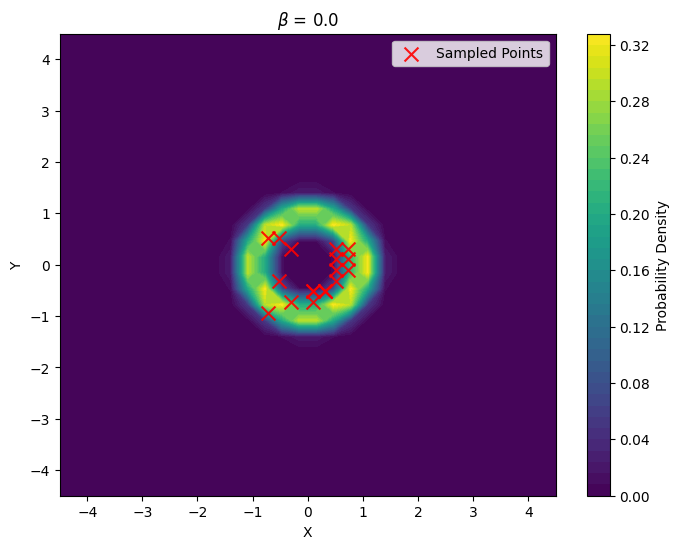

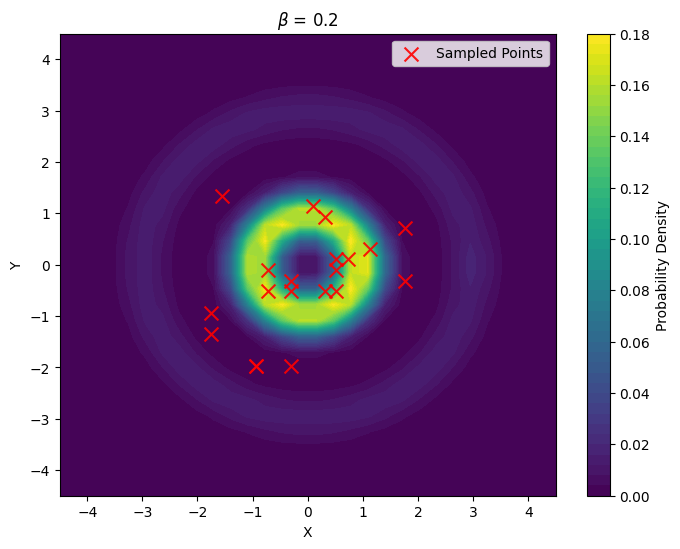

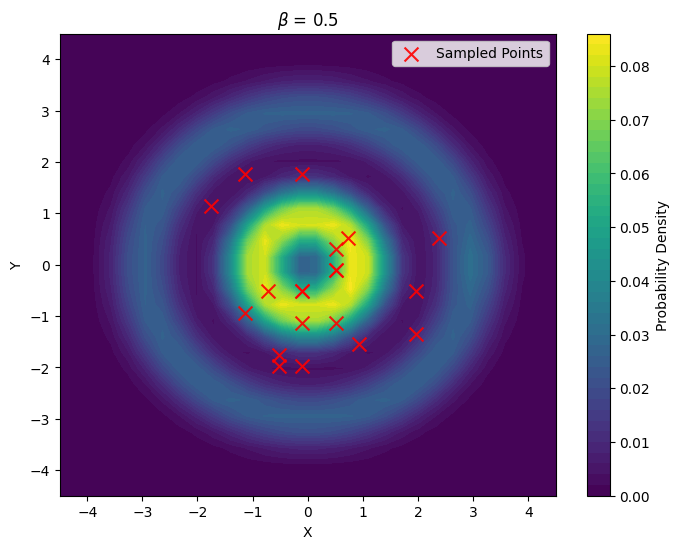

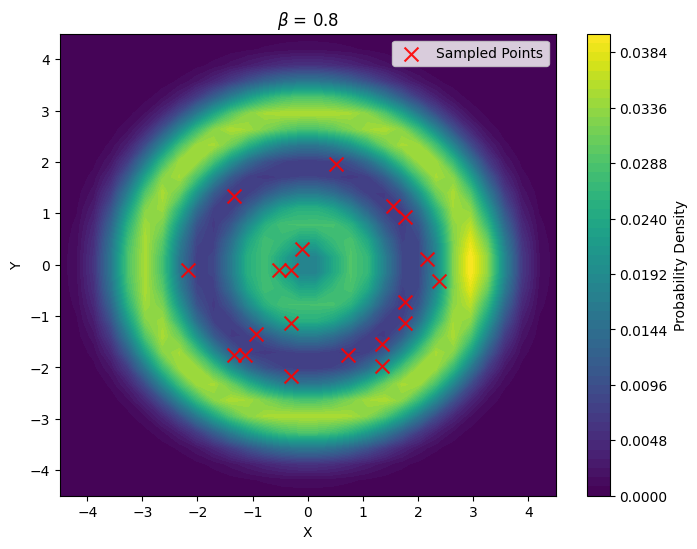

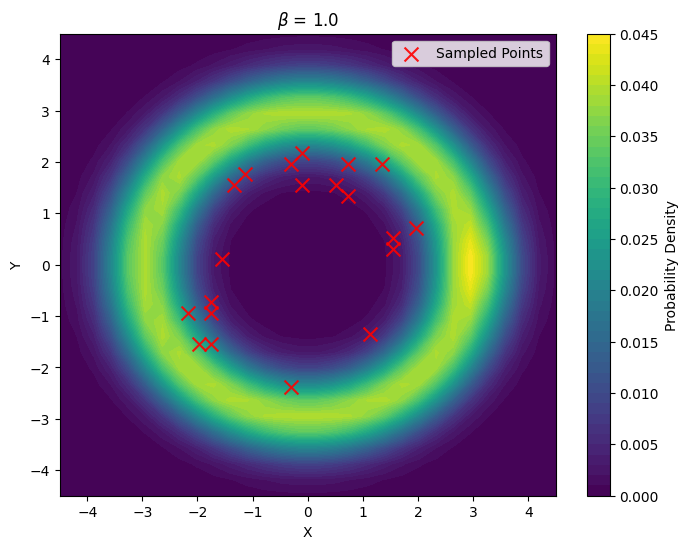

In [13]:
# Generate the point clouds
theta = np.linspace(0, 2*np.pi, 100)
r1, r2 = 3, 1  
x1, y1 = r1 * np.cos(theta), r1 * np.sin(theta)
x2, y2 = r2 * np.cos(theta), r2 * np.sin(theta)
pcd1 = np.column_stack([x1, y1])
pcd2 = np.column_stack([x2, y2])

# Beta values to explore
betas = [0.0, 0.2, 0.5, 0.8, 1.0]
# Margin around the plot
margin = 1.5

# Loop over each beta value
for beta in betas:
    # Create weights based on beta
    weights1 = np.ones(pcd1.shape[0]) * beta
    weights2 = np.ones(pcd2.shape[0]) * (1 - beta)
    
    # Merge the point clouds and weights
    merged_pcd = np.vstack([pcd1, pcd2])
    merged_weights = np.concatenate([weights1, weights2])
    
    # Create the merged KDE
    merged_kde = gaussian_kde(merged_pcd.T, weights=merged_weights, bw_method=0.25)
    
    # Create the grid for evaluation
    x_min, x_max = merged_pcd[:, 0].min()-margin, merged_pcd[:, 0].max()+margin
    y_min, y_max = merged_pcd[:, 1].min()-margin, merged_pcd[:, 1].max()+margin
    xi, yi = np.mgrid[x_min:x_max:30j, y_min:y_max:30j]
    grid_coords = np.vstack([xi.ravel(), yi.ravel()])
    
    # Evaluate the KDE
    kde_values = merged_kde.evaluate(grid_coords).reshape(xi.shape)
    
    # Sample points from the KDE
    sampled_points = sample_from_kde(merged_pcd, kde_values, num_samples=20)
    
    # Plotting
    plt.figure(figsize=(8, 6))
    plt.contourf(xi, yi, kde_values, levels=50, cmap='viridis')
    plt.colorbar(label='Probability Density')
    plt.scatter(sampled_points[:, 0], sampled_points[:, 1], c='red', marker='x', label='Sampled Points', alpha=0.9, s=100)
    plt.title(fr'$\beta$ = {beta}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

In [14]:
## mean, var
def calc_mean_var(lst):
    n = len(lst)
    if n == 0: return None, None
    mean = sum(lst) / n
    var = sum((x - mean)**2 for x in lst) / n
    return mean, var


In [15]:
exp_kit_t = [2.1255, 3.6871, 5.4783]
exp_kit_sr = [0.85, 0.85, 0.95]

print(calc_mean_var(exp_kit_t))
print(calc_mean_var(exp_kit_sr))

(3.7636333333333334, 1.876473315555555)
(0.8833333333333333, 0.0022222222222222214)


In [16]:
exp_kit_t = [1.3339, 1.3688, 1.8781, 1.4896, 1.3131]

print(calc_mean_var(exp_kit_t))


(1.4767, 0.04401751600000002)


In [17]:
exp_kit_t = [3.426, 3.7146, 4.0124, 3.5667, 3.774]

print(calc_mean_var(exp_kit_t))


(3.69874, 0.03922397440000004)


In [18]:
exp_kit_t = [5.2072, 5.5705, 5.5141, 5.3834, 5.3904]

print(calc_mean_var(exp_kit_t))


(5.413119999999999, 0.015753589599999986)


In [19]:
exp_kit_t = [4.6038, 4.5746, 4.4417, 4.5, 4.3937]

print(calc_mean_var(exp_kit_t))


(4.50276, 0.006200018399999996)


In [20]:
exp_kit_t = [3.6172, 3.6106, 3.7221, 3.7904, 4.1074]

print(calc_mean_var(exp_kit_t))


(3.76954, 0.03306089440000003)


In [21]:
exp_kit_t = [9.2353, 9.0253, 9.5684, 8.86, 8.6722]

print(calc_mean_var(exp_kit_t))


(9.072239999999999, 0.09600889840000017)


In [22]:
test = [14.1,
8.5,
13.5,
13.1,
13.1]

print(calc_mean_var(test))

(12.46, 4.054399999999999)


In [23]:
test = [25.9,
25.1,
22.8,
29.6,
23.2]

print(calc_mean_var(test))

(25.32, 5.909600000000002)


In [24]:
## mean, var
def calc_mean_var(lst):
    n = len(lst)
    if n == 0: return None, None
    mean = sum(lst) / n
    var = sum((x - mean)**2 for x in lst) / n
    return mean, var

exp_kit_t = [2.36, 2.73, 2.49]
exp_kit_sr = [0.8, 0.75, 0.45]

exp_kit_t_cap = [12.1, 9.7, 9.9]
exp_kit_sr_cap = [0.75, 0.60, 0.60]

exp_kit_t_l2r = [104.1, 107.1, 133.1]
exp_kit_sr_l2r = [0.75, 0.80, 0.35]

exp_kit_t_our = [1.66, 4.07, 5.02]
exp_kit_sr_our = [1.0, 0.95, 0.95]

exp_shelf_t = [2.53, 2.62]
exp_shelf_sr = [0.95, 0.85]

exp_shelf_t_cap = [5.7, 9.38]
exp_shelf_sr_cap = [0.45, 0.40]

exp_shelf_t_l2r = [123.5, 124.6]
exp_shelf_sr_l2r = [0.8, 1.0]

exp_shelf_t_our = [7.11, 5.74]
exp_shelf_sr_our = [0.90, 1.0]


In [25]:
print(calc_mean_var(exp_kit_t), calc_mean_var(exp_kit_sr))

(2.526666666666667, 0.023488888888888892) (0.6666666666666666, 0.02388888888888889)


In [26]:
print(calc_mean_var(exp_kit_t_cap), calc_mean_var(exp_kit_sr_cap))

(10.566666666666665, 1.182222222222222) (0.65, 0.005000000000000001)


In [27]:
print(calc_mean_var(exp_kit_t_l2r), calc_mean_var(exp_kit_sr_l2r))

(114.76666666666665, 169.55555555555557) (0.6333333333333333, 0.04055555555555556)


In [28]:
print(calc_mean_var(exp_kit_t_our), calc_mean_var(exp_kit_sr_our))

(3.5833333333333335, 2.000022222222222) (0.9666666666666667, 0.0005555555555555566)


In [29]:
print(calc_mean_var(exp_shelf_t), calc_mean_var(exp_shelf_sr))

(2.575, 0.0020250000000000138) (0.8999999999999999, 0.0024999999999999988)


In [30]:
print(calc_mean_var(exp_shelf_t_cap), calc_mean_var(exp_shelf_sr_cap))

(7.540000000000001, 3.385600000000001) (0.42500000000000004, 0.0006249999999999997)


In [31]:
print(calc_mean_var(exp_shelf_t_l2r), calc_mean_var(exp_shelf_sr_l2r))

(124.05, 0.3024999999999969) (0.9, 0.009999999999999995)


In [32]:
print(calc_mean_var(exp_shelf_t_our), calc_mean_var(exp_shelf_sr_our))

(6.425000000000001, 0.46922500000000006) (0.95, 0.0024999999999999988)


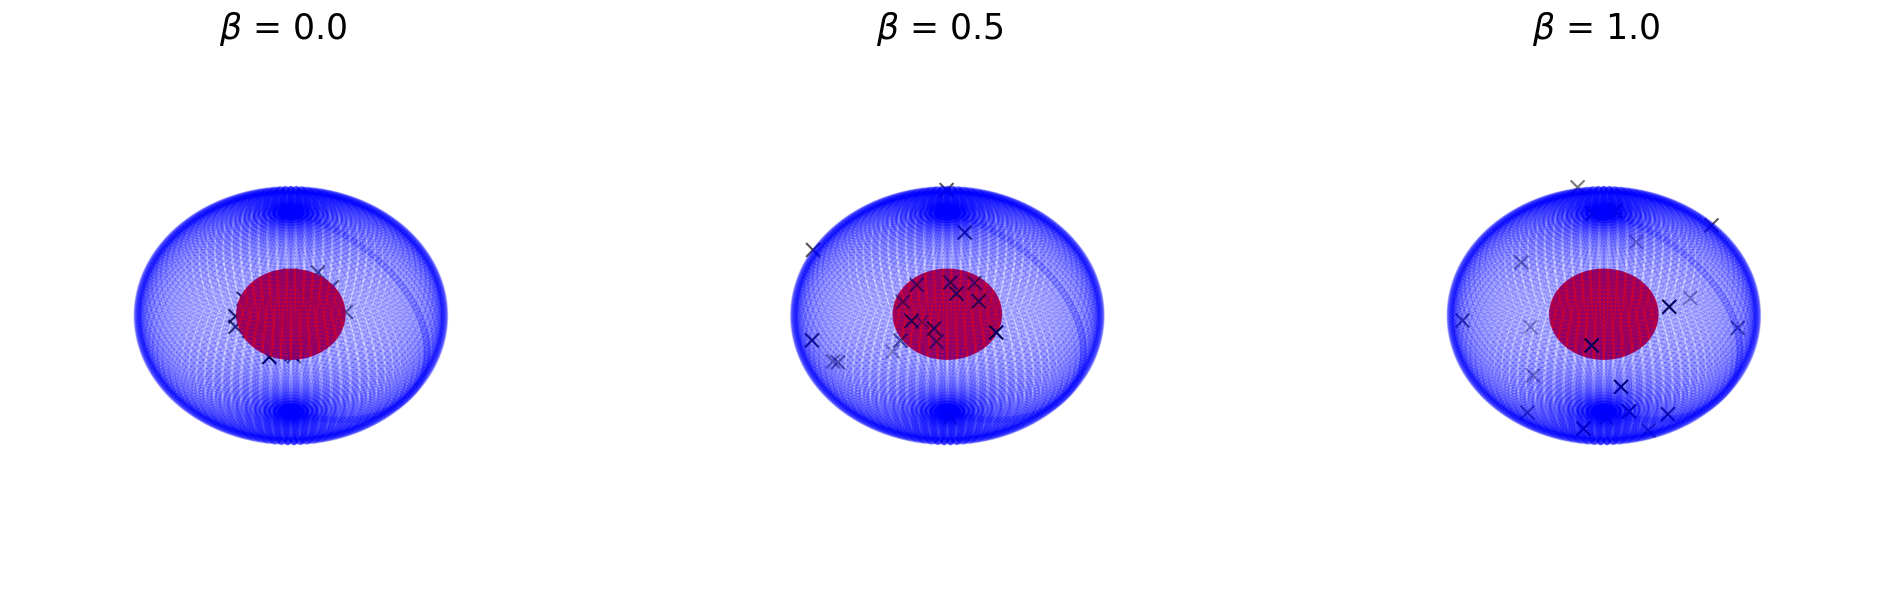

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

def sample_from_kde_3d(pcd, kde_values, num_samples=10):
    kde_values_flat = kde_values.flatten()
    kde_values_norm = kde_values_flat / np.sum(kde_values_flat)
    sampled_indices = np.random.choice(len(kde_values_flat), size=num_samples, p=kde_values_norm)
    sampled_coords = np.array(np.unravel_index(sampled_indices, kde_values.shape)).T

    x_range = np.linspace(pcd[:, 0].min(), pcd[:, 0].max(), kde_values.shape[0])
    y_range = np.linspace(pcd[:, 1].min(), pcd[:, 1].max(), kde_values.shape[1])
    z_range = np.linspace(pcd[:, 2].min(), pcd[:, 2].max(), kde_values.shape[2])
    
    sampled_xyz = np.array([x_range[sampled_coords[:, 0]], y_range[sampled_coords[:, 1]], z_range[sampled_coords[:, 2]]]).T

    return sampled_xyz

# Generate 3D point clouds using spherical coordinates
phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2 * np.pi, 100)
phi, theta = np.meshgrid(phi, theta)
r = 3

x1 = r * np.sin(phi) * np.cos(theta)
y1 = r * np.sin(phi) * np.sin(theta)
z1 = r * np.cos(phi)

x1, y1, z1 = x1.ravel(), y1.ravel(), z1.ravel()
pcd1 = np.column_stack([x1, y1, z1])

# Second point cloud
r = 1
x2 = r * np.sin(phi) * np.cos(theta)
y2 = r * np.sin(phi) * np.sin(theta)
z2 = r * np.cos(phi)

x2, y2, z2 = x2.ravel(), y2.ravel(), z2.ravel()
pcd2 = np.column_stack([x2, y2, z2])

betas = [0.0, 0.5, 1.0]

fig = plt.figure(figsize=(24, 8))

for beta in betas:
    weights1 = np.ones(pcd1.shape[0]) * beta
    weights2 = np.ones(pcd2.shape[0]) * (1 - beta)
    merged_pcd = np.vstack([pcd1, pcd2])
    merged_weights = np.concatenate([weights1, weights2])

    merged_kde = gaussian_kde(merged_pcd.T, weights=merged_weights, bw_method=0.15)

    x_min, x_max = merged_pcd[:, 0].min(), merged_pcd[:, 0].max()
    y_min, y_max = merged_pcd[:, 1].min(), merged_pcd[:, 1].max()
    z_min, z_max = merged_pcd[:, 2].min(), merged_pcd[:, 2].max()
    xi, yi, zi = np.mgrid[x_min:x_max:20j, y_min:y_max:20j, z_min:z_max:20j]

    grid_coords = np.vstack([xi.ravel(), yi.ravel(), zi.ravel()])

    kde_values = merged_kde.evaluate(grid_coords).reshape(xi.shape)
    sampled_points = sample_from_kde_3d(merged_pcd, kde_values, num_samples=20)

    ax = fig.add_subplot(1, 3, betas.index(beta) + 1, projection='3d')
    ax.scatter(pcd1[:, 0], pcd1[:, 1], pcd1[:, 2], c='blue', alpha=0.1)
    ax.scatter(pcd2[:, 0], pcd2[:, 1], pcd2[:, 2], c='red', alpha=0.1)
    ax.scatter(sampled_points[:, 0], sampled_points[:, 1], sampled_points[:, 2], c='black', marker='x', s=100)
    ax.set_title(fr'$\beta$ = {beta}', fontsize=25)
    ax.axis('off')
plt.show()
